In [1]:
import numpy as np
from scipy import signal, io
from matplotlib import pyplot as plt
from scipy import signal
from copy import deepcopy

In [2]:
num = 128
filename = './n0' + str(num) + '_LGS_trs.sav'
telemetry = io.readsav(filename)['b']
print(telemetry.dtype)

(numpy.record, [(('conf_id', 'CONF_ID'), 'O'), (('timestamp', 'TIMESTAMP'), 'O'), (('apdcounts', 'APDCOUNTS'), 'O'), (('dttcentroids', 'DTTCENTROIDS'), 'O'), (('dttcommands', 'DTTCOMMANDS'), 'O'), (('dttstraingauge', 'DTTSTRAINGAUGE'), 'O'), (('dttcommandsclipped', 'DTTCOMMANDSCLIPPED'), 'O')])


In [21]:
telemetry = io.readsav(filename)['b']
commands = deepcopy(telemetry['DTTCOMMANDS'])[0][0]
commands = commands - np.mean(commands, axis=0)
residuals = telemetry['DTTCENTROIDS'][0]

In [26]:
pol = residuals[1:] + commands[:-1]

(1e-07, 0.0022220860732529565)

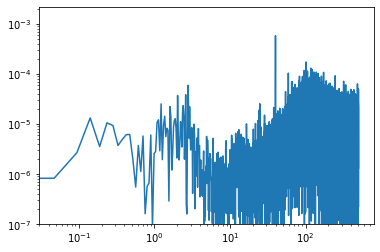

In [31]:
plt.loglog(*signal.periodogram(pol[:,0], fs=1000))
plt.ylim(1e-7)

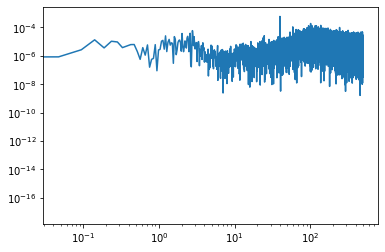

In [28]:
plt.loglog(*signal.periodogram(residuals[:,0], fs=1000))